In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read data set into Pandas Dataframe
historical_data = pd.read_csv('spreadspoke_scores.csv')

In [3]:
#Start to look at Pandas Dataframe
historical_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [4]:
#Drop some columns called out
historical_data_dropped = historical_data.drop(columns = ['weather_temperature','weather_wind_mph','weather_humidity','weather_detail'])

In [5]:
historical_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12667 entries, 0 to 12666
Data columns (total 13 columns):
schedule_date       12667 non-null object
schedule_season     12667 non-null int64
schedule_week       12667 non-null object
schedule_playoff    12667 non-null bool
team_home           12667 non-null object
score_home          12411 non-null float64
score_away          12411 non-null float64
team_away           12667 non-null object
team_favorite_id    9932 non-null object
spread_favorite     9932 non-null float64
over_under_line     9922 non-null object
stadium             12667 non-null object
stadium_neutral     12667 non-null bool
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 1.1+ MB


In [6]:
historical_data_dropped.count()

schedule_date       12667
schedule_season     12667
schedule_week       12667
schedule_playoff    12667
team_home           12667
score_home          12411
score_away          12411
team_away           12667
team_favorite_id     9932
spread_favorite      9932
over_under_line      9922
stadium             12667
stadium_neutral     12667
dtype: int64

In [7]:
#Drop rows with NA data in the 'over_under_line' column
historical_data_dropped2 = historical_data_dropped.dropna(axis=0,how='any',thresh=None,subset=['over_under_line'],inplace=False)

In [8]:
historical_data_dropped2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 350 to 12410
Data columns (total 13 columns):
schedule_date       9922 non-null object
schedule_season     9922 non-null int64
schedule_week       9922 non-null object
schedule_playoff    9922 non-null bool
team_home           9922 non-null object
score_home          9922 non-null float64
score_away          9922 non-null float64
team_away           9922 non-null object
team_favorite_id    9922 non-null object
spread_favorite     9922 non-null float64
over_under_line     9922 non-null object
stadium             9922 non-null object
stadium_neutral     9922 non-null bool
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 949.6+ KB


In [9]:
#Drop columns with stadium data
hist_data_df = historical_data_dropped2.drop(columns = ['stadium','stadium_neutral'])

In [10]:
hist_data_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34


In [11]:
# Add a column summing total score of the game
hist_data_df['total_score'] = hist_data_df['score_home']+hist_data_df['score_away']

In [12]:
hist_data_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,47.0
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,23.0
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,30.0
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,29.0
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,27.0


In [13]:
hist_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 350 to 12410
Data columns (total 12 columns):
schedule_date       9922 non-null object
schedule_season     9922 non-null int64
schedule_week       9922 non-null object
schedule_playoff    9922 non-null bool
team_home           9922 non-null object
score_home          9922 non-null float64
score_away          9922 non-null float64
team_away           9922 non-null object
team_favorite_id    9922 non-null object
spread_favorite     9922 non-null float64
over_under_line     9922 non-null object
total_score         9922 non-null float64
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 939.9+ KB


In [14]:
#Convert data in over_under_line column to float64 data from object/string data
hist_data_df['over_under_line']=pd.to_numeric(hist_data_df.over_under_line, errors='coerce')

In [15]:
hist_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 350 to 12410
Data columns (total 12 columns):
schedule_date       9922 non-null object
schedule_season     9922 non-null int64
schedule_week       9922 non-null object
schedule_playoff    9922 non-null bool
team_home           9922 non-null object
score_home          9922 non-null float64
score_away          9922 non-null float64
team_away           9922 non-null object
team_favorite_id    9922 non-null object
spread_favorite     9922 non-null float64
over_under_line     9860 non-null float64
total_score         9922 non-null float64
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 939.9+ KB


In [16]:
#Drop further data with NAN values in over_under_line column
hist_data_df = hist_data_df.dropna(axis=0,how='any',thresh=None,subset=['over_under_line'],inplace=False)

In [17]:
hist_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9860 entries, 350 to 12410
Data columns (total 12 columns):
schedule_date       9860 non-null object
schedule_season     9860 non-null int64
schedule_week       9860 non-null object
schedule_playoff    9860 non-null bool
team_home           9860 non-null object
score_home          9860 non-null float64
score_away          9860 non-null float64
team_away           9860 non-null object
team_favorite_id    9860 non-null object
spread_favorite     9860 non-null float64
over_under_line     9860 non-null float64
total_score         9860 non-null float64
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 934.0+ KB


In [18]:
hist_data_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43.0,47.0
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40.0,23.0
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39.0,30.0
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36.0,29.0
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34.0,27.0


In [19]:
hist_data_df['over_under_result'] = np.where(hist_data_df['total_score'] >= hist_data_df['over_under_line'],1,0)

In [20]:
#Create new column, over_under_result, based on conditions outlined to determine the outcome of a bet
conditions = [(hist_data_df['total_score'] > hist_data_df['over_under_line']),
             (hist_data_df['total_score'] < hist_data_df['over_under_line'])]
choices = [1,0]
hist_data_df['over_under_result'] = np.select(conditions, choices, default = 2)

In [21]:
hist_data_df.head(50)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score,over_under_result
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43.0,47.0,1
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40.0,23.0,0
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39.0,30.0,0
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36.0,29.0,0
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34.0,27.0,0
1294,01/14/1973,1972,Superbowl,True,Miami Dolphins,14.0,7.0,Washington Redskins,MIA,-1.0,33.0,21.0,0
1483,01/13/1974,1973,Superbowl,True,Miami Dolphins,24.0,7.0,Minnesota Vikings,MIA,-6.5,33.0,31.0,0
1672,01/12/1975,1974,Superbowl,True,Minnesota Vikings,6.0,16.0,Pittsburgh Steelers,PIT,-3.0,33.0,22.0,0
1861,01/18/1976,1975,Superbowl,True,Dallas Cowboys,17.0,21.0,Pittsburgh Steelers,PIT,-7.0,36.0,38.0,1
2064,01/09/1977,1976,Superbowl,True,Minnesota Vikings,14.0,32.0,Oakland Raiders,OAK,-4.0,38.0,46.0,1


In [22]:
is_push = hist_data_df['over_under_result']==2

In [23]:
hist_data_df['over_under_result'].max()

2

In [24]:
hist_data_df_overunderpush = hist_data_df[is_push]

In [25]:
hist_data_df_overunderpush.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 2591 to 12372
Data columns (total 13 columns):
schedule_date        185 non-null object
schedule_season      185 non-null int64
schedule_week        185 non-null object
schedule_playoff     185 non-null bool
team_home            185 non-null object
score_home           185 non-null float64
score_away           185 non-null float64
team_away            185 non-null object
team_favorite_id     185 non-null object
spread_favorite      185 non-null float64
over_under_line      185 non-null float64
total_score          185 non-null float64
over_under_result    185 non-null int64
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 19.0+ KB


In [26]:
#The above work was done to confirm the over under push calculations were correct

In [27]:
#Drop all records prior to 1979

In [28]:
#Drop all records prior to 1979 because they do not include full season data
hist_data_df = hist_data_df[hist_data_df.schedule_season >= 1979]

In [29]:
hist_data_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score,over_under_result
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30.0,47.0,1
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39.0,16.0,0
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31.0,9.0,0
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,10.0,0
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37.0,14.0,0


In [30]:
# Determine count of 0,1,2 in over_under_result column for each season and week
# First lets get a list of all seasons
Seasons_Series = hist_data_df['schedule_season']
Seasons_dic = {}
for i in Seasons_Series:
    Seasons_dic[i] = 1
Seasons = list(Seasons_dic.keys())
ScheduleWeek_Series = hist_data_df['schedule_week']
ScheduleWeek_dic = {}
for i in ScheduleWeek_Series:
    ScheduleWeek_dic[i] = 1
ScheduleWeek = list(ScheduleWeek_dic.keys())
#Let's only focus on Regular Season for now
ScheduleWeek = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
ScheduleWeek

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

In [31]:
#Next, determine the ROI for each season betting an Over or Under MF. 
#Let's assume that $100 is bet on EACH game
bet = 100
hist_data_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score,over_under_result
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30.0,47.0,1
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39.0,16.0,0
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31.0,9.0,0
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,10.0,0
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37.0,14.0,0
2506,09/02/1979,1979,1,False,Los Angeles Rams,17.0,24.0,Oakland Raiders,LAR,-4.0,36.5,41.0,1
2507,09/02/1979,1979,1,False,Minnesota Vikings,28.0,22.0,San Francisco 49ers,MIN,-7.0,32.0,50.0,1
2508,09/02/1979,1979,1,False,New Orleans Saints,34.0,40.0,Atlanta Falcons,NO,-5.0,32.0,74.0,1
2509,09/02/1979,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,41.0,47.0,1
2510,09/02/1979,1979,1,False,Philadelphia Eagles,23.0,17.0,New York Giants,PHI,-7.0,31.5,40.0,1


In [32]:
#Create under Mutual Fund takings; What is the winning/takings for each game if you take the under and bet $100
conditions_under = [(hist_data_df['over_under_result'] == 0),
             (hist_data_df['over_under_result'] == 1),(hist_data_df['over_under_result'] == 2)]
choices_under = [round(bet*(10/11),2),-bet,0]
hist_data_df['underMF_takings'] = np.select(conditions_under, choices_under, default = 'NA')

In [33]:
#Create over Mutual Fund takings; What is the winning/takings for each game if you take the over and bet $100
conditions_over = [(hist_data_df['over_under_result'] == 0),
             (hist_data_df['over_under_result'] == 1),(hist_data_df['over_under_result'] == 2)]
choices_over = [-bet,round(bet*(10/11),2),0]
hist_data_df['overMF_takings'] = np.select(conditions_over, choices_over, default = 'NA')

In [34]:
#Create a record of the winnings the SportsBook will make taking the bets for each fund. SB == SportsBook a.k.a DraftKings
#Start with the under fund:
conditions_under_SB = [(hist_data_df['over_under_result'] == 0),
             (hist_data_df['over_under_result'] == 1),(hist_data_df['over_under_result'] == 2)]
choices_under_SB = [-round(bet*(10/11),2),bet,0]
hist_data_df['underMF_SB_takings'] = np.select(conditions_under_SB, choices_under_SB, default = 'NA')
#Now the over fund:
conditions_over_SB = [(hist_data_df['over_under_result'] == 0),
             (hist_data_df['over_under_result'] == 1),(hist_data_df['over_under_result'] == 2)]
choices_over_SB = [bet,-round(bet*(10/11),2),0]
hist_data_df['overMF_SB_takings'] = np.select(conditions_over_SB, choices_over_SB, default = 'NA')

In [35]:
hist_data_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score,over_under_result,underMF_takings,overMF_takings,underMF_SB_takings,overMF_SB_takings
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30.0,47.0,1,-100,90.91,100,-90.91
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39.0,16.0,0,90.91,-100,-90.91,100
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31.0,9.0,0,90.91,-100,-90.91,100
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,10.0,0,90.91,-100,-90.91,100
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37.0,14.0,0,90.91,-100,-90.91,100
2506,09/02/1979,1979,1,False,Los Angeles Rams,17.0,24.0,Oakland Raiders,LAR,-4.0,36.5,41.0,1,-100,90.91,100,-90.91
2507,09/02/1979,1979,1,False,Minnesota Vikings,28.0,22.0,San Francisco 49ers,MIN,-7.0,32.0,50.0,1,-100,90.91,100,-90.91
2508,09/02/1979,1979,1,False,New Orleans Saints,34.0,40.0,Atlanta Falcons,NO,-5.0,32.0,74.0,1,-100,90.91,100,-90.91
2509,09/02/1979,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,41.0,47.0,1,-100,90.91,100,-90.91
2510,09/02/1979,1979,1,False,Philadelphia Eagles,23.0,17.0,New York Giants,PHI,-7.0,31.5,40.0,1,-100,90.91,100,-90.91


In [36]:
#Now let's determine the takings and ROI for each fund for each year.
#Reiterate only considering Regular Season
print(Seasons)
print(ScheduleWeek)
hist_data_df.info()

[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9848 entries, 2501 to 12410
Data columns (total 17 columns):
schedule_date         9848 non-null object
schedule_season       9848 non-null int64
schedule_week         9848 non-null object
schedule_playoff      9848 non-null bool
team_home             9848 non-null object
score_home            9848 non-null float64
score_away            9848 non-null float64
team_away             9848 non-null object
team_favorite_id      9848 non-null object
spread_favorite       9848 non-null float64
over_under_line       9848 non-null float64
total_score           9848 non-null float64
over_under_result     9848 non

In [37]:
#Need to convert last four columns to numbers
hist_data_df['underMF_takings']=pd.to_numeric(hist_data_df.underMF_takings, errors='coerce')
hist_data_df['overMF_takings']=pd.to_numeric(hist_data_df.overMF_takings, errors='coerce')
hist_data_df['underMF_SB_takings']=pd.to_numeric(hist_data_df.underMF_SB_takings, errors='coerce')
hist_data_df['overMF_SB_takings']=pd.to_numeric(hist_data_df.overMF_SB_takings, errors='coerce')
hist_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9848 entries, 2501 to 12410
Data columns (total 17 columns):
schedule_date         9848 non-null object
schedule_season       9848 non-null int64
schedule_week         9848 non-null object
schedule_playoff      9848 non-null bool
team_home             9848 non-null object
score_home            9848 non-null float64
score_away            9848 non-null float64
team_away             9848 non-null object
team_favorite_id      9848 non-null object
spread_favorite       9848 non-null float64
over_under_line       9848 non-null float64
total_score           9848 non-null float64
over_under_result     9848 non-null int64
underMF_takings       9848 non-null float64
overMF_takings        9848 non-null float64
underMF_SB_takings    9848 non-null float64
overMF_SB_takings     9848 non-null float64
dtypes: bool(1), float64(9), int64(2), object(5)
memory usage: 1.3+ MB


In [38]:
#Start with the underMF_takings column:
#list key for dic key value pair; key = 'Season' pair = [taking, total bet, ROI]
underMF_takings_dic = {}
for j in Seasons:
    is_Season = (hist_data_df['schedule_season'] == j)
    hist_data_df_iter1 = hist_data_df[is_Season]
    s = hist_data_df_iter1['underMF_takings']
    taking = round(s.sum(),2)
    total_bet = (s.count())*bet
    ROI = round((taking/total_bet)*100,2)
    underMF_takings_dic[j] = [taking, total_bet, ROI]
#Now collect this data for rest of MFs
overMF_takings_dic = {}
for j in Seasons:
    is_Season = (hist_data_df['schedule_season'] == j)
    hist_data_df_iter1 = hist_data_df[is_Season]
    s = hist_data_df_iter1['overMF_takings']
    taking = round(s.sum(),2)
    total_bet = (s.count())*bet
    ROI = round((taking/total_bet)*100,2)
    overMF_takings_dic[j] = [taking, total_bet, ROI]
    
underMF_SB_takings_dic = {}
for j in Seasons:
    is_Season = (hist_data_df['schedule_season'] == j)
    hist_data_df_iter1 = hist_data_df[is_Season]
    s = hist_data_df_iter1['underMF_SB_takings']
    taking = round(s.sum(),2)
    underMF_SB_takings_dic[j] = [taking]
    
overMF_SB_takings_dic = {}
for j in Seasons:
    is_Season = (hist_data_df['schedule_season'] == j)
    hist_data_df_iter1 = hist_data_df[is_Season]
    s = hist_data_df_iter1['overMF_SB_takings']
    taking = round(s.sum(),2)
    overMF_SB_takings_dic[j] = [taking]


In [39]:
#Calculate Overall ROIs for both under and over Mutual Funds:
underMF_all = round(hist_data_df['underMF_takings'].sum(),2)
overMF_all = round(hist_data_df['overMF_takings'].sum(),2)
underMF_all_ROI = round((underMF_all/((hist_data_df['underMF_takings'].count())*bet))*100,3)
overMF_all_ROI = round((overMF_all/((hist_data_df['overMF_takings'].count())*bet))*100,3)

In [40]:
import statistics

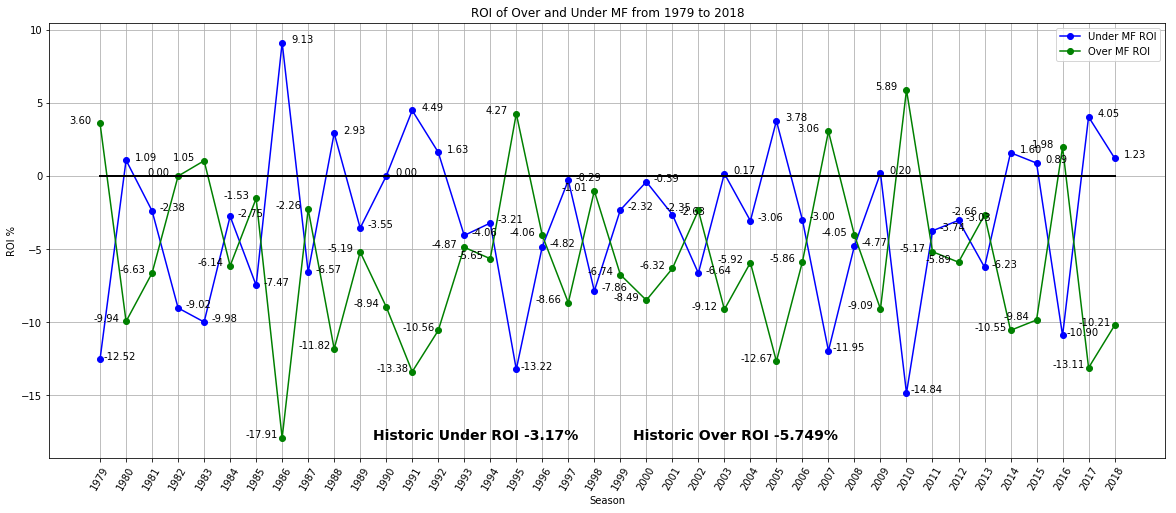

In [41]:
#Start by showing individual ROI by year in a plot
#First let's extract the information
underMF_takings_ROI = []
for i in underMF_takings_dic:
    ROI_i = underMF_takings_dic[i][2]
    underMF_takings_ROI.append(ROI_i)
overMF_takings_ROI = []
for n in overMF_takings_dic:
    ROI_n = overMF_takings_dic[n][2]
    overMF_takings_ROI.append(ROI_n)
#Now let's plot and format

underROI_mean = statistics.mean(underMF_takings_ROI)
overROI_mean = statistics.mean(overMF_takings_ROI)


plt.figure(figsize = [20,8])
plt.plot(Seasons,underMF_takings_ROI,'bo-',label = 'Under MF ROI')
plt.plot(Seasons,overMF_takings_ROI,'go-',label = 'Over MF ROI')
plt.plot(Seasons,np.zeros(len(Seasons)),'k-', linewidth = 2)
plt.xlabel('Season')
plt.xticks(Seasons, rotation = 60)
plt.ylabel('ROI %')
plt.grid()
for x,y in zip(Seasons, underMF_takings_ROI):
    label_under = "{:.2f}".format(y)
    plt.annotate(label_under,(x,y),textcoords = "offset points",xytext=(20,0),ha = 'center')
for x,y in zip(Seasons, overMF_takings_ROI):
    label_under = "{:.2f}".format(y)
    plt.annotate(label_under,(x,y),textcoords = "offset points",xytext=(-20,0),ha = 'center')
plt.text(1989.5,-18,'Historic Under ROI {}%'.format(underMF_all_ROI),weight = 'bold',fontsize = 14)
plt.text(1999.5,-18,'Historic Over ROI {}%'.format(overMF_all_ROI),weight = 'bold',fontsize = 14)
plt.legend()
plt.title('ROI of Over and Under MF from 1979 to 2018')
plt.show()


In [42]:
hist_data_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_score,over_under_result,underMF_takings,overMF_takings,underMF_SB_takings,overMF_SB_takings
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30.0,47.0,1,-100.00,90.91,100.00,-90.91
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39.0,16.0,0,90.91,-100.00,-90.91,100.00
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31.0,9.0,0,90.91,-100.00,-90.91,100.00
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,10.0,0,90.91,-100.00,-90.91,100.00
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37.0,14.0,0,90.91,-100.00,-90.91,100.00
2506,09/02/1979,1979,1,False,Los Angeles Rams,17.0,24.0,Oakland Raiders,LAR,-4.0,36.5,41.0,1,-100.00,90.91,100.00,-90.91
2507,09/02/1979,1979,1,False,Minnesota Vikings,28.0,22.0,San Francisco 49ers,MIN,-7.0,32.0,50.0,1,-100.00,90.91,100.00,-90.91
2508,09/02/1979,1979,1,False,New Orleans Saints,34.0,40.0,Atlanta Falcons,NO,-5.0,32.0,74.0,1,-100.00,90.91,100.00,-90.91
2509,09/02/1979,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,41.0,47.0,1,-100.00,90.91,100.00,-90.91
2510,09/02/1979,1979,1,False,Philadelphia Eagles,23.0,17.0,New York Giants,PHI,-7.0,31.5,40.0,1,-100.00,90.91,100.00,-90.91


In [43]:
#To use pandas dataframe replace module, want to get a team name to id dictionary.
nfl_teams = pd.read_csv('nfl_teams.csv')
team_name = nfl_teams['team_name']
team_id = nfl_teams['team_id']
team_name_id_dic = {}
for i in range(0,len(team_name)):
    team_name_id_dic[team_name[i]] = team_id[i]

In [44]:
#Now add columns with the team_home and team_away ids instead of names
hist_data_df_name = hist_data_df.replace(team_name_id_dic)
hist_data_name = hist_data_df_name.drop(columns = ['over_under_line','total_score','over_under_result','underMF_takings',
                                 'overMF_takings','underMF_SB_takings','overMF_SB_takings'])
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0


In [45]:
#Set up score difference column
hist_data_name['home_minus_away'] = hist_data_name['score_home'] - hist_data_name['score_away']
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,home_minus_away
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,15.0
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,-2.0
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,3.0
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,10.0
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,14.0


In [46]:
#Determine outright winner column
conditions = [(hist_data_name['home_minus_away'] > 0),
             (hist_data_name['home_minus_away'] < 0),
             (hist_data_name['home_minus_away'] == 0)]
choices = [hist_data_name['team_home'],hist_data_name['team_away'],'tie']
hist_data_name['winner'] = np.select(conditions, choices, default = 2)
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,home_minus_away,winner
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,15.0,TB
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,-2.0,MIA
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,3.0,CHI
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,10.0,DEN
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,14.0,KC


In [47]:
#Get ATS_score
conditions = [(hist_data_name['team_favorite_id'] == hist_data_name['team_home']),
             (hist_data_name['team_favorite_id'] == hist_data_name['team_away'])]
choices = [hist_data_name['score_home']+hist_data_name['spread_favorite']-hist_data_name['score_away'],
           hist_data_name['score_away']+hist_data_name['spread_favorite']-hist_data_name['score_home']]
hist_data_name['ATS_score'] = np.select(conditions, choices)
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,home_minus_away,winner,ATS_score
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,15.0,TB,12.0
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,-2.0,MIA,-3.0
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,3.0,CHI,0.0
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,10.0,DEN,7.0
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,14.0,KC,13.0


In [48]:
#Identify team_underdog
conditions = [(hist_data_name['team_favorite_id'] == hist_data_name['team_home']),
             (hist_data_name['team_favorite_id'] == hist_data_name['team_away'])]
choices = [hist_data_name['team_away'],hist_data_name['team_home']]
hist_data_name['team_underdog_id'] = np.select(conditions, choices)
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,home_minus_away,winner,ATS_score,team_underdog_id
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,15.0,TB,12.0,DET
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,-2.0,MIA,-3.0,BUF
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,3.0,CHI,0.0,GB
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,10.0,DEN,7.0,CIN
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,14.0,KC,13.0,IND


In [49]:
#Declare ATS_winner
conditions = [(hist_data_name['ATS_score'] > 0),
             (hist_data_name['ATS_score'] < 0),
             (hist_data_name['team_favorite_id'] == 'PICK')]
choices = [hist_data_name['team_favorite_id'],hist_data_name['team_underdog_id'],hist_data_name['winner']]
hist_data_name['ATS_winner'] = np.select(conditions, choices,default = 'Push')
hist_data_name.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,home_minus_away,winner,ATS_score,team_underdog_id,ATS_winner
2501,09/01/1979,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,15.0,TB,12.0,DET,TB
2502,09/02/1979,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,-2.0,MIA,-3.0,BUF,BUF
2503,09/02/1979,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,3.0,CHI,0.0,GB,Push
2504,09/02/1979,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,10.0,DEN,7.0,CIN,DEN
2505,09/02/1979,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,14.0,KC,13.0,IND,KC


Input Team ID: CHI


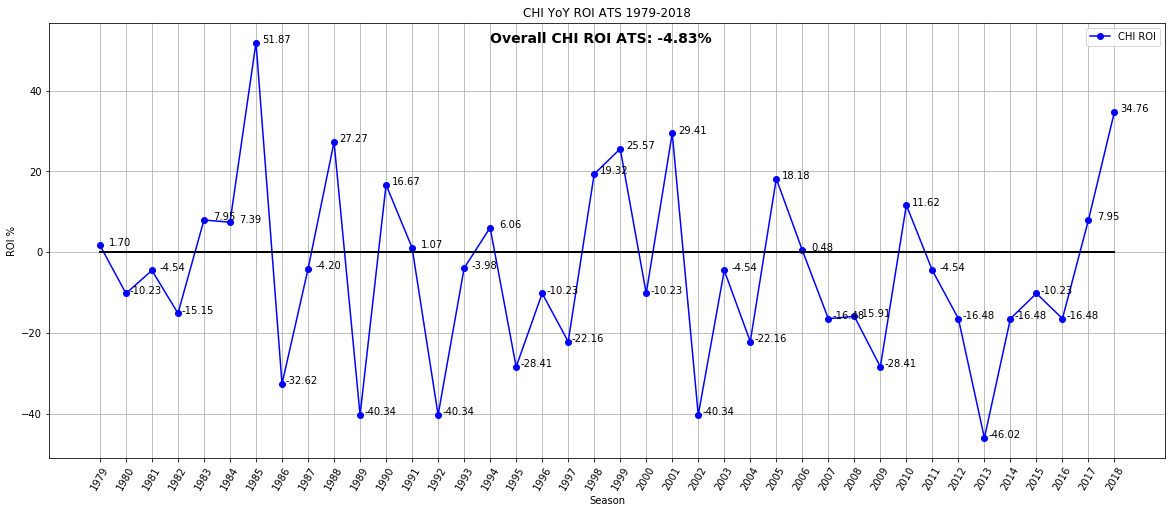

In [50]:
#Select a team to track every game for
team = str(input("Input Team ID: "))
is_team = hist_data_name[(hist_data_name.team_home == team) | (hist_data_name.team_away == team)].copy()
conditions = [(is_team['ATS_winner'] == team),
             (is_team['ATS_winner'] == 'Push')]
choices = [round(bet*(10/11),2), round(0,2)]
is_team['ind_game_taking'] = np.select(conditions,choices, default = round(-bet,2))
team_takings = {}
for j in Seasons:
    is_Season = (is_team['schedule_season'] == j)
    is_team_iter1 = is_team[is_Season]
    s = is_team_iter1['ind_game_taking']
    taking = round(s.sum(),2)
    total_bet = (s.count())*bet
    ROI = round((taking/total_bet)*100,2)
    team_takings[j] = [taking, total_bet, ROI]
#Extract ROI information for each team
ind_team_ROI = []
for i in team_takings:
    ROI_i = team_takings[i][2]
    ind_team_ROI.append(ROI_i)

#Now plot and format:

teamROI_mean = round(statistics.mean(ind_team_ROI),2)

plt.figure(figsize = [20,8])
plt.plot(Seasons,ind_team_ROI,'bo-',label = '{} ROI'.format(team))
plt.plot(Seasons,np.zeros(len(Seasons)),'k-', linewidth = 2)
plt.xlabel('Season')
plt.xticks(Seasons, rotation = 60)
plt.ylabel('ROI %')
plt.grid()
for x,y in zip(Seasons, ind_team_ROI):
    label_under = "{:.2f}".format(y)
    plt.annotate(label_under,(x,y),textcoords = "offset points",xytext=(20,0),ha = 'center')
plt.text(1994,max(ind_team_ROI),'Overall {} ROI ATS: {}%'.format(team,teamROI_mean),weight = 'bold',fontsize = 14)
plt.legend()
plt.title('{} YoY ROI ATS 1979-2018'.format(team))
plt.show()

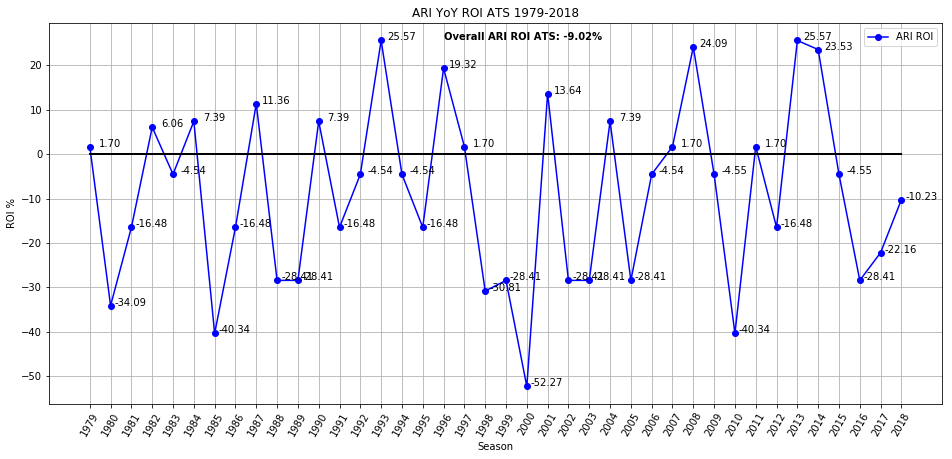

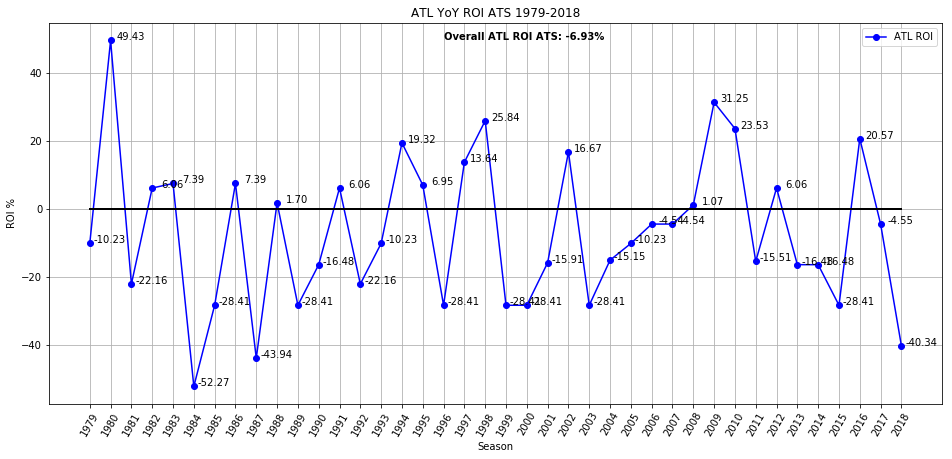

/Users/mikeysoukup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
posx and posy should be finite values
posx and posy should be finite values


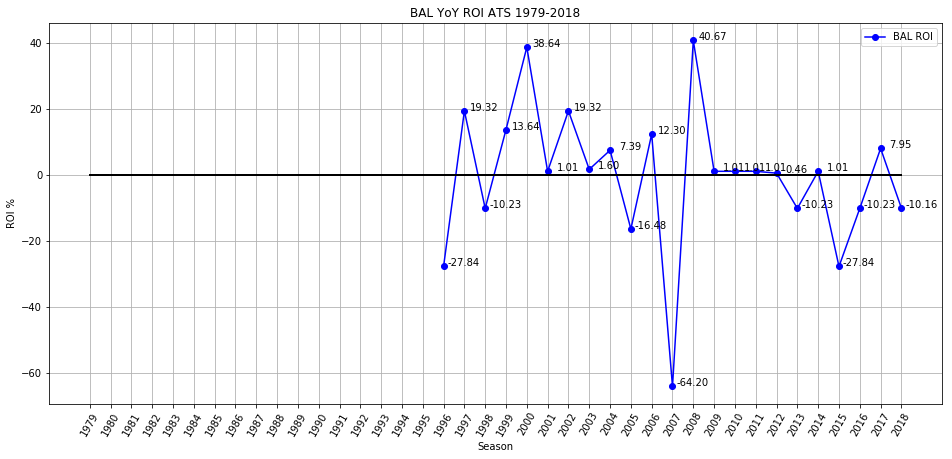

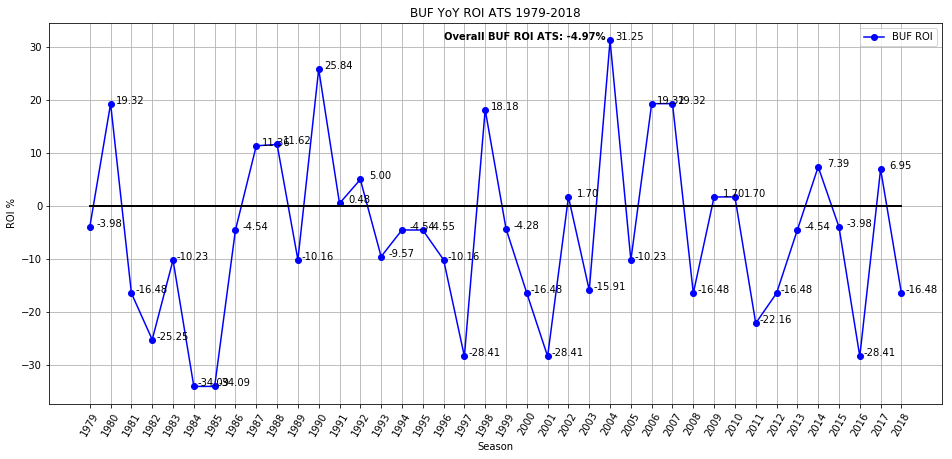

posx and posy should be finite values
posx and posy should be finite values


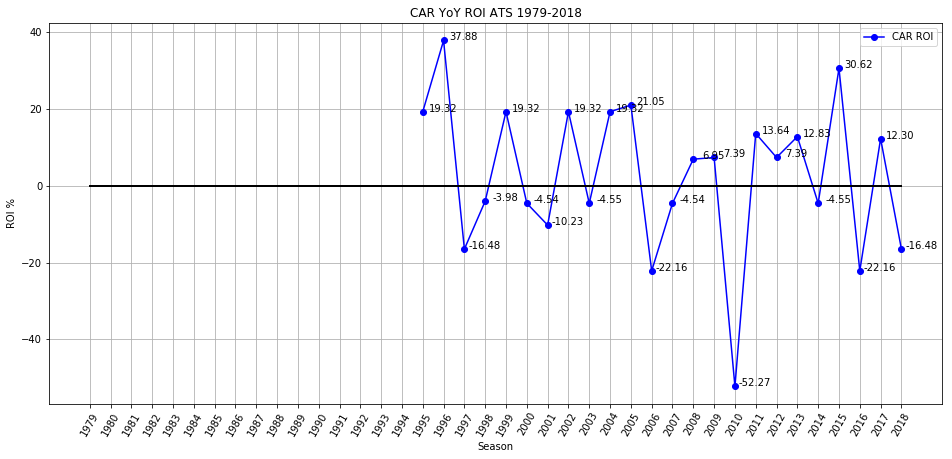

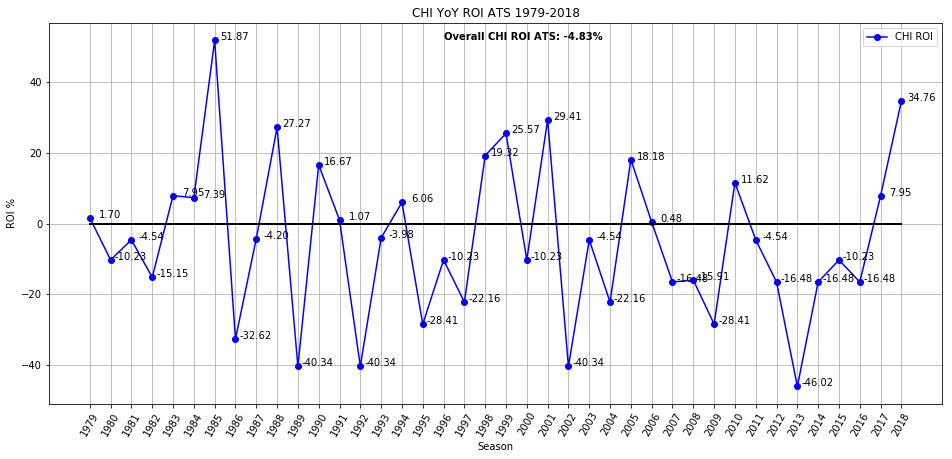

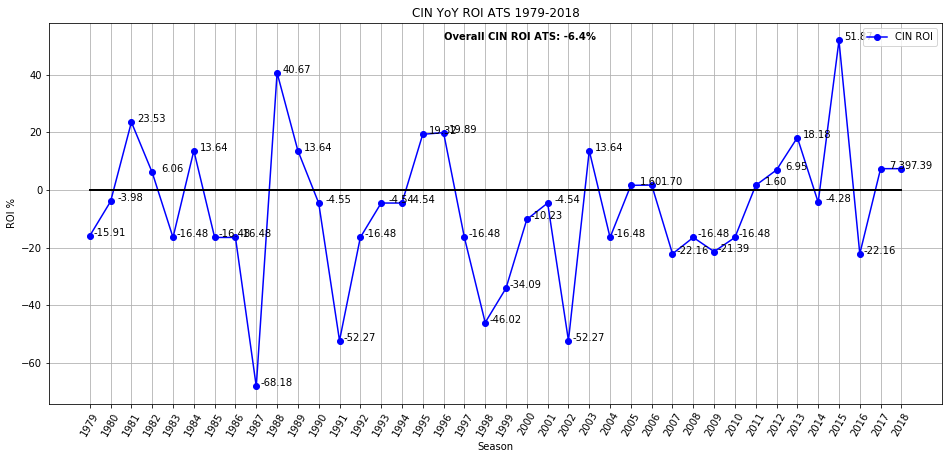

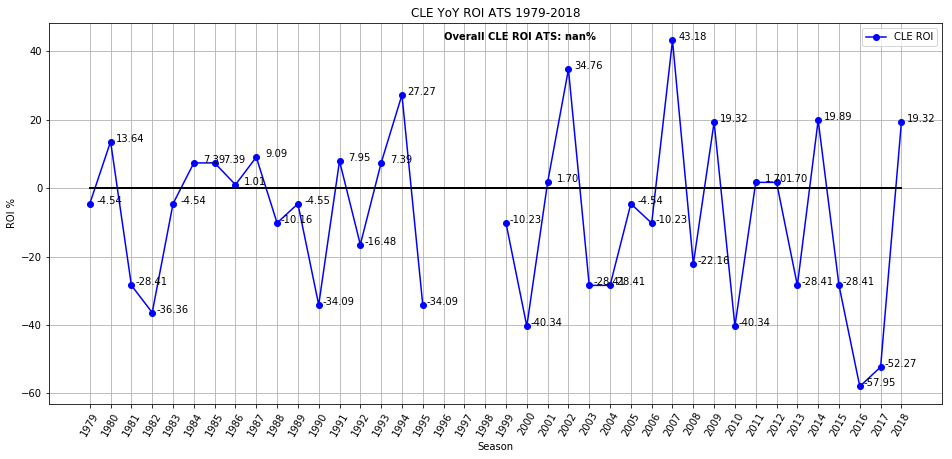

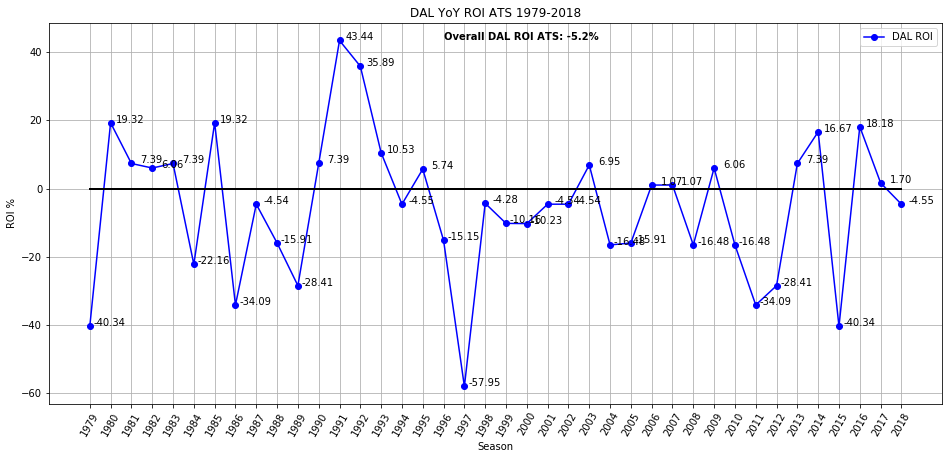

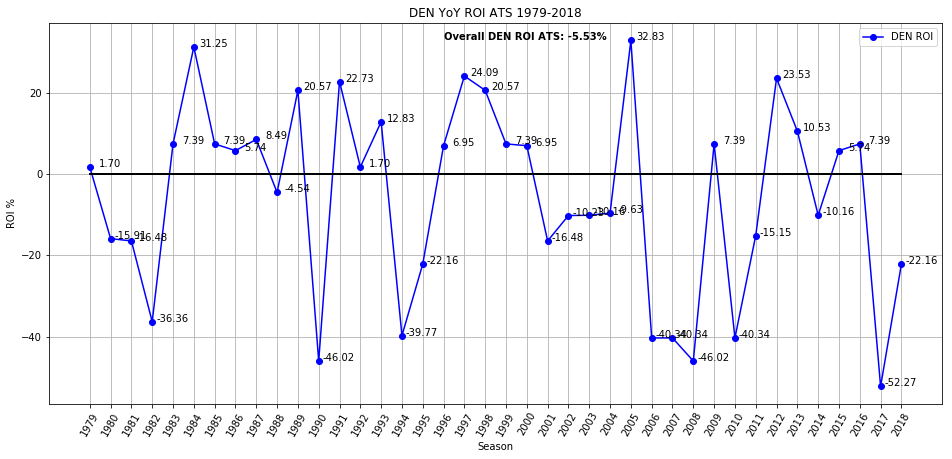

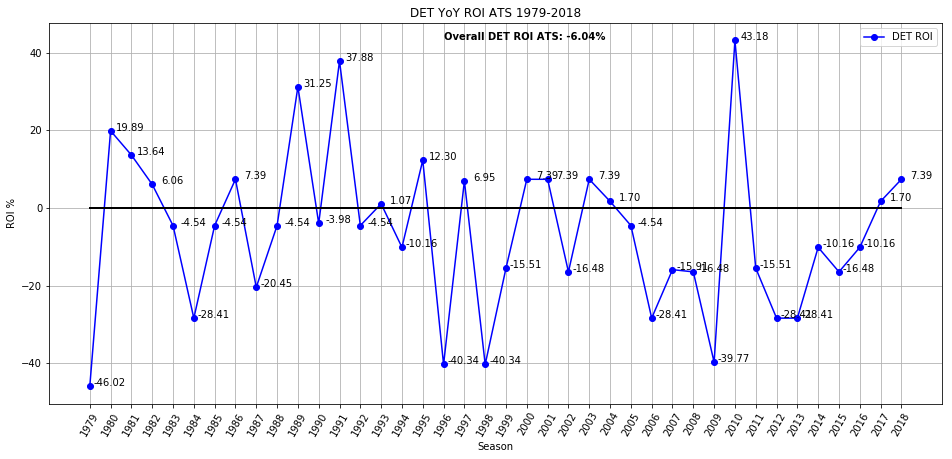

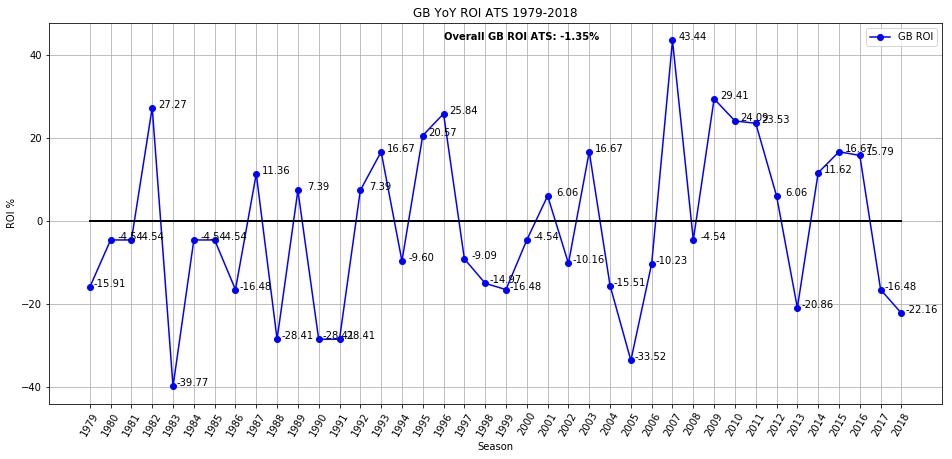

posx and posy should be finite values
posx and posy should be finite values


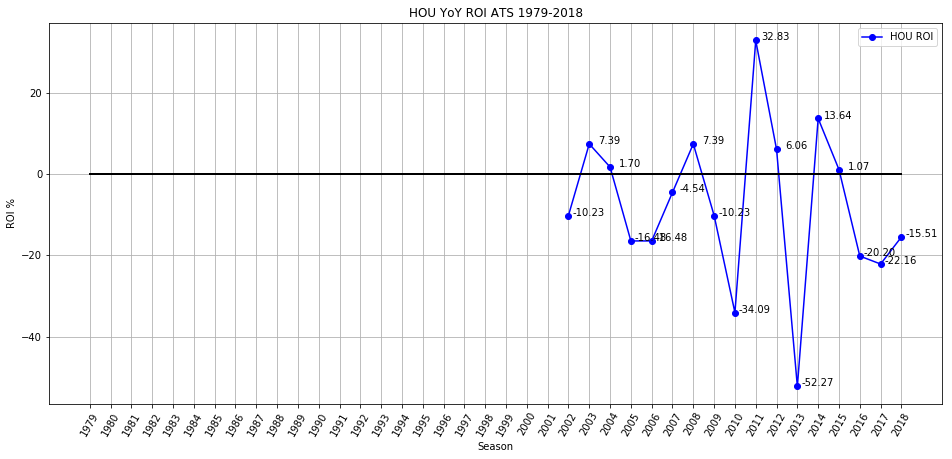

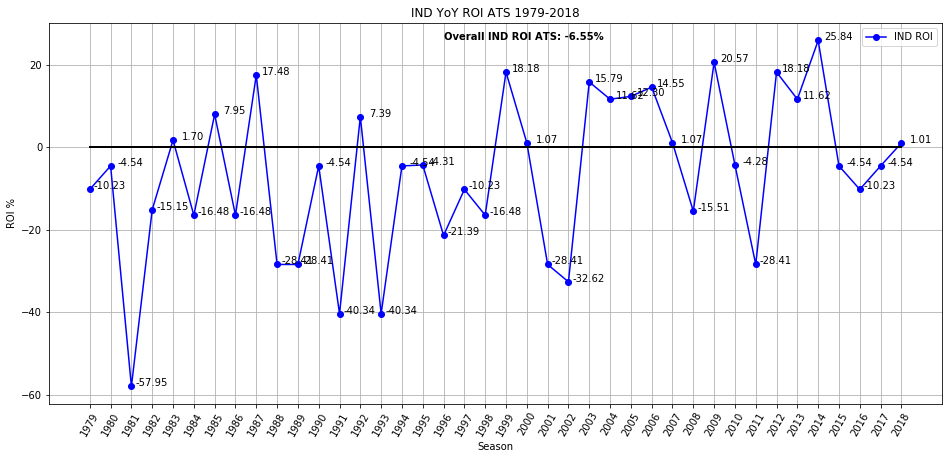

posx and posy should be finite values
posx and posy should be finite values


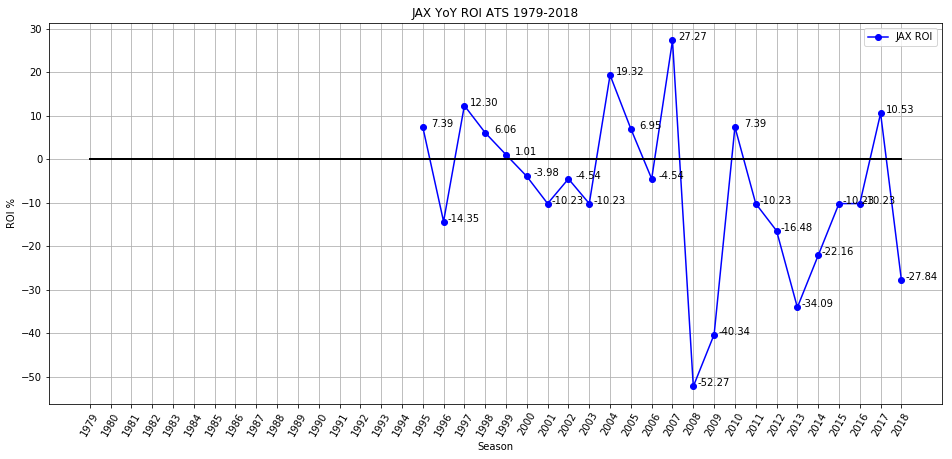

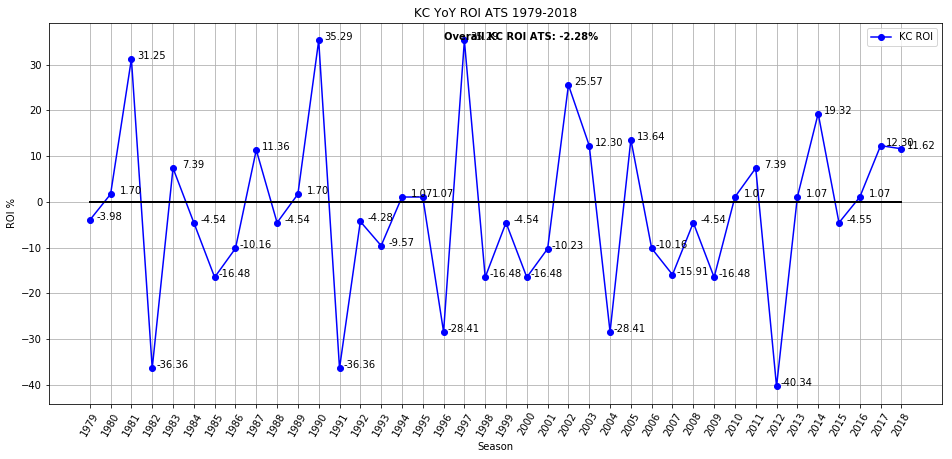

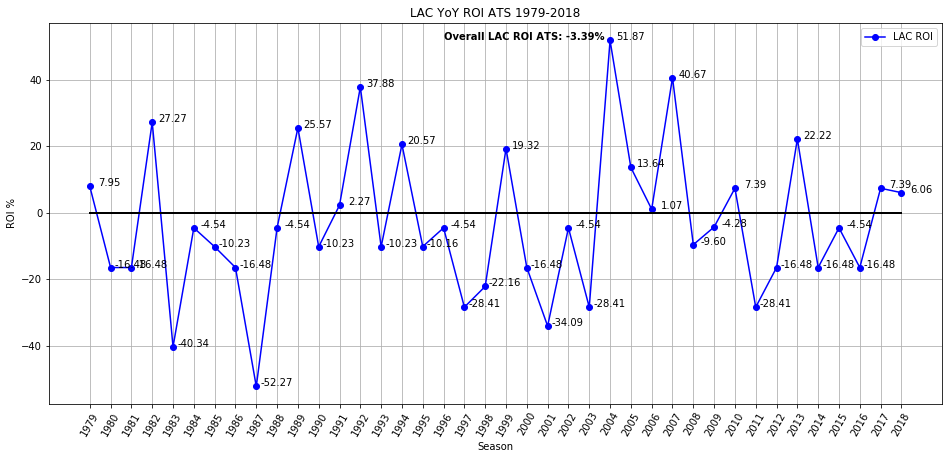

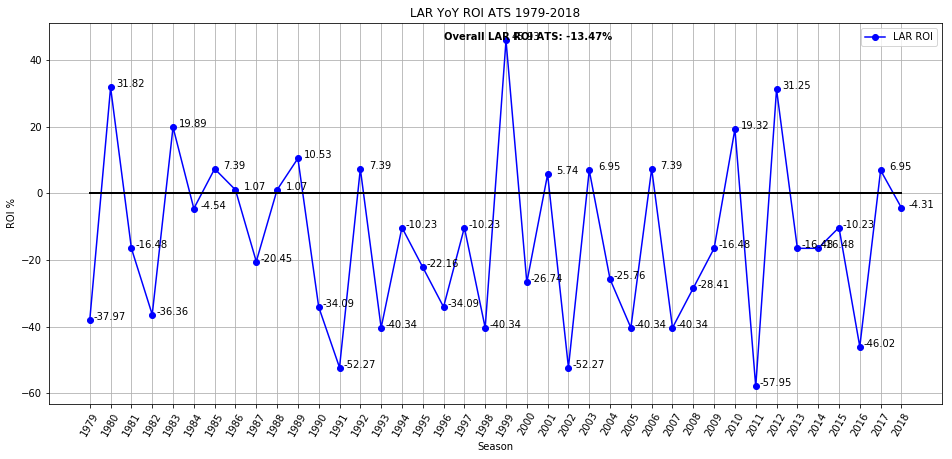

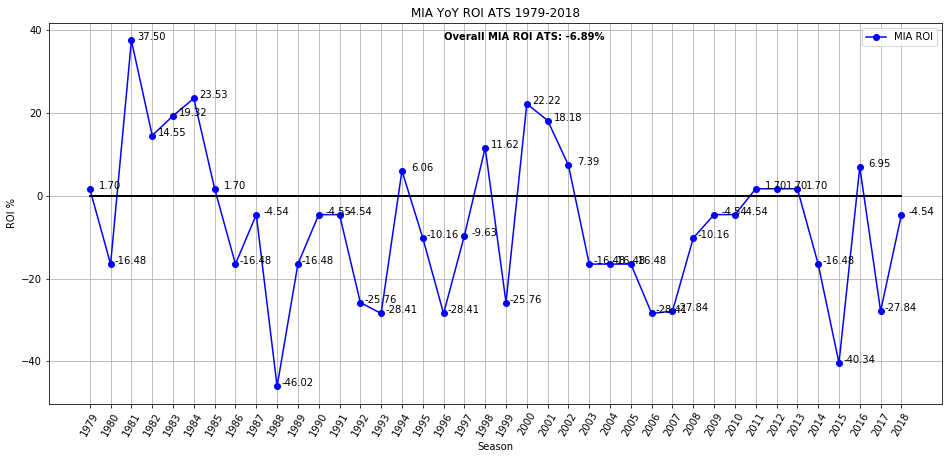

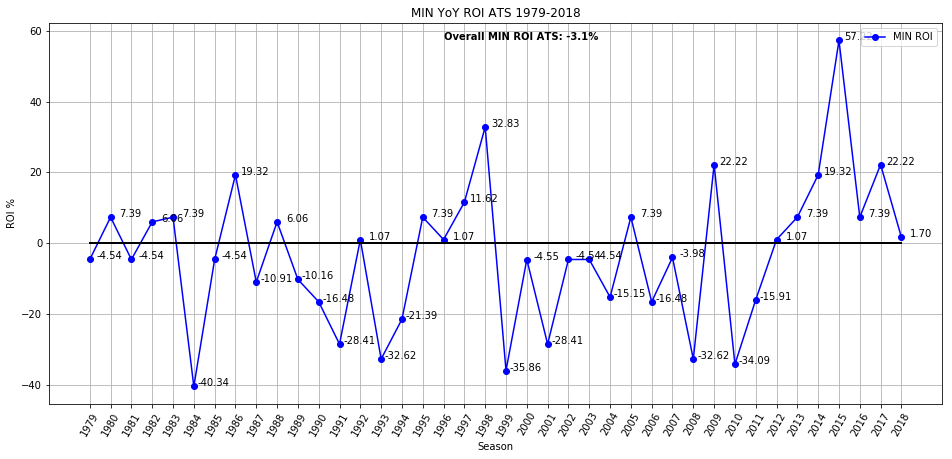

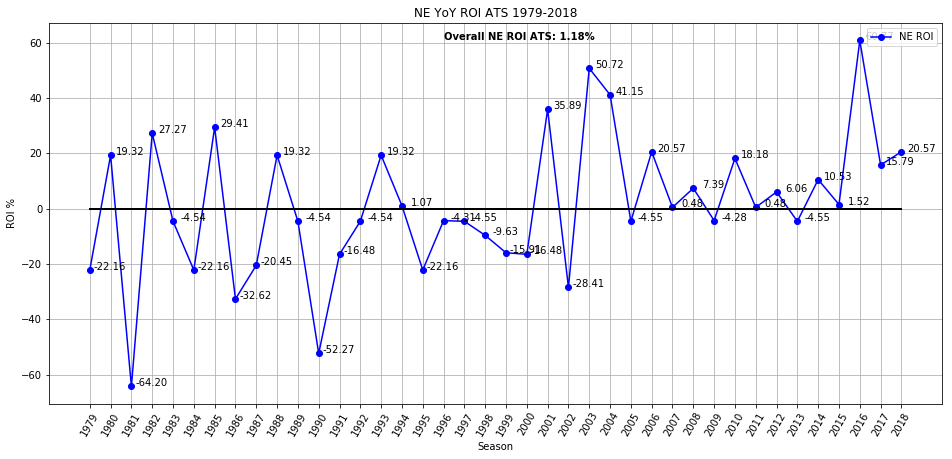

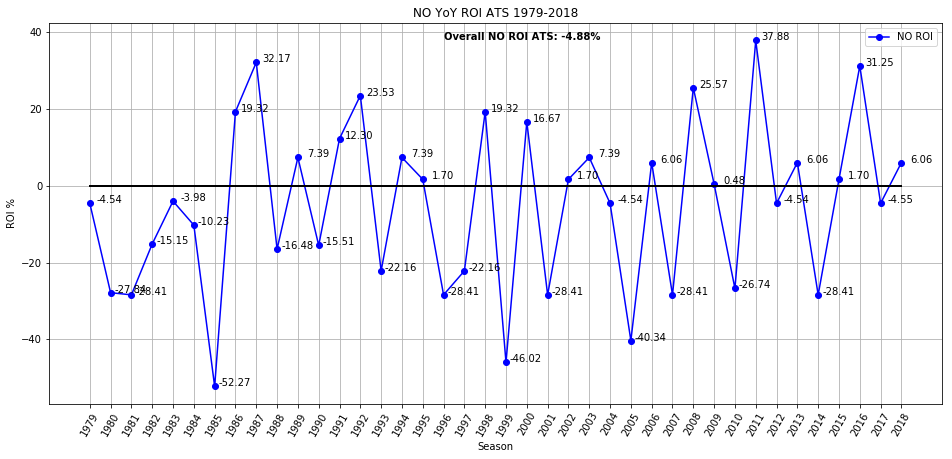

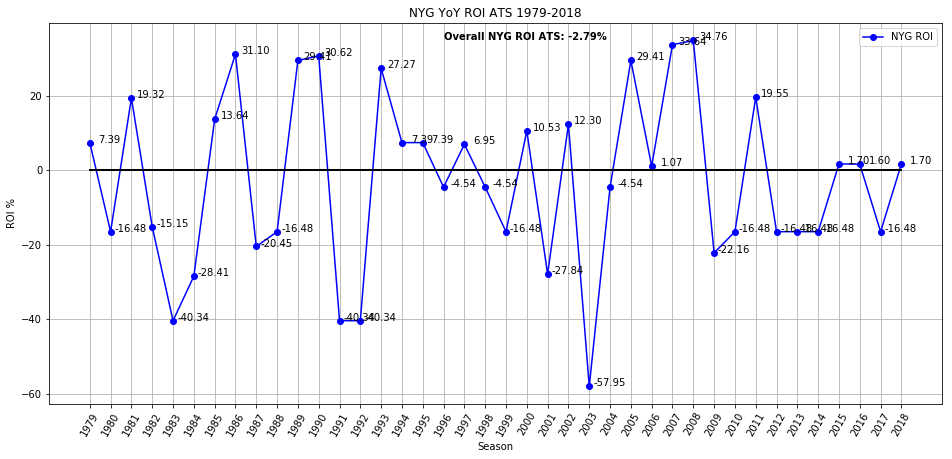

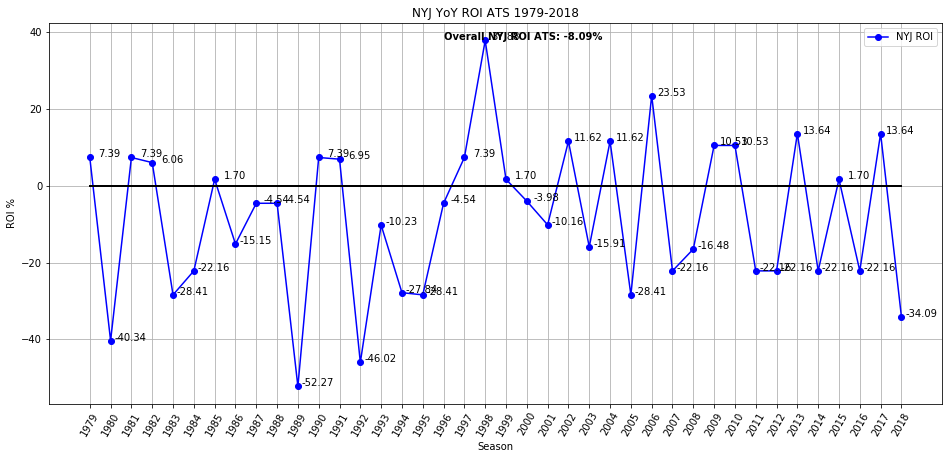

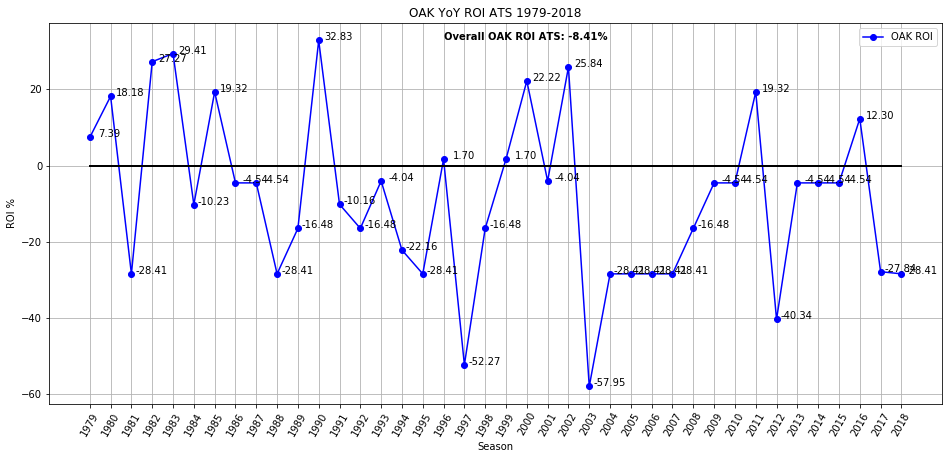

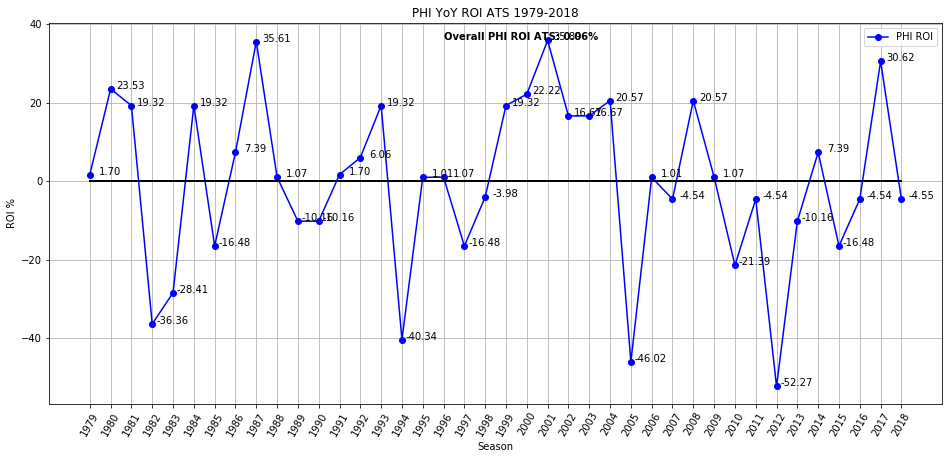

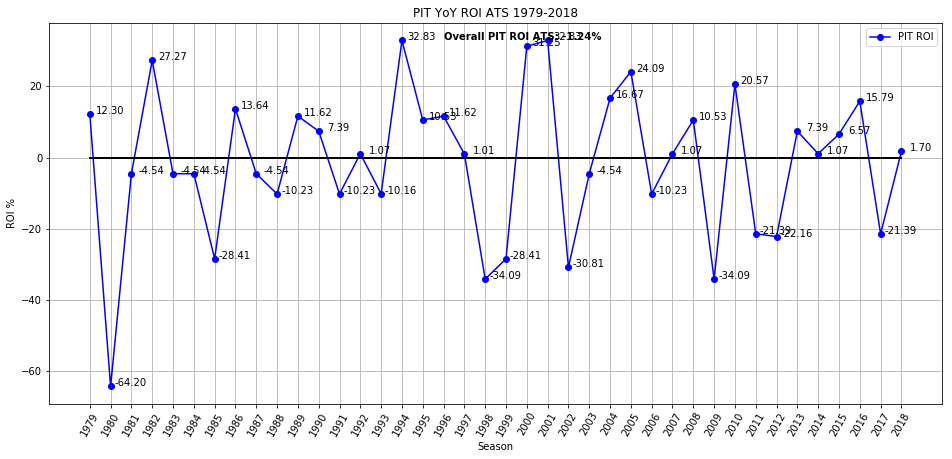

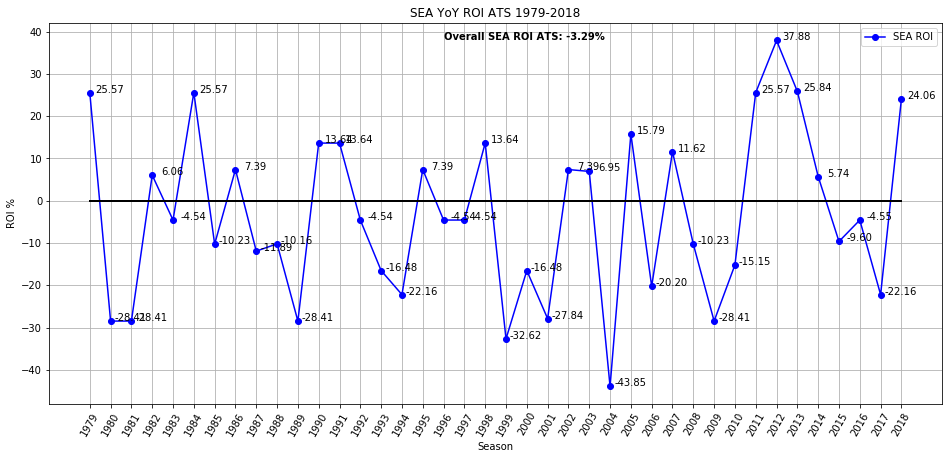

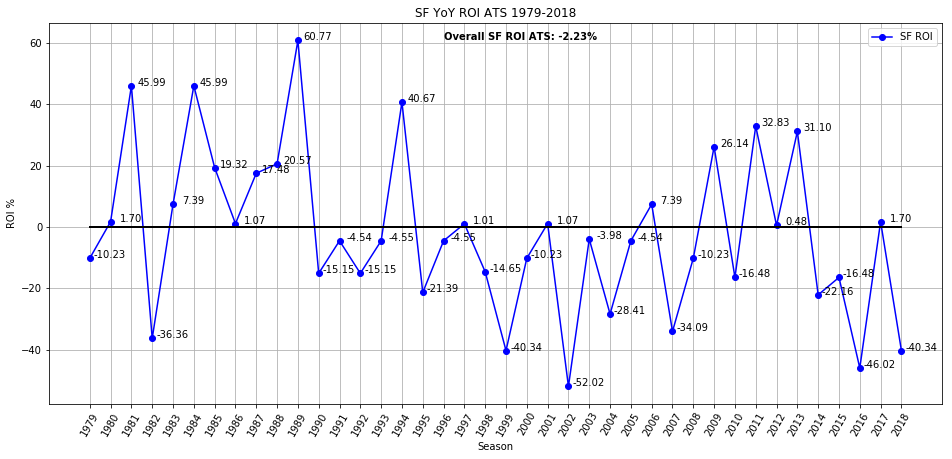

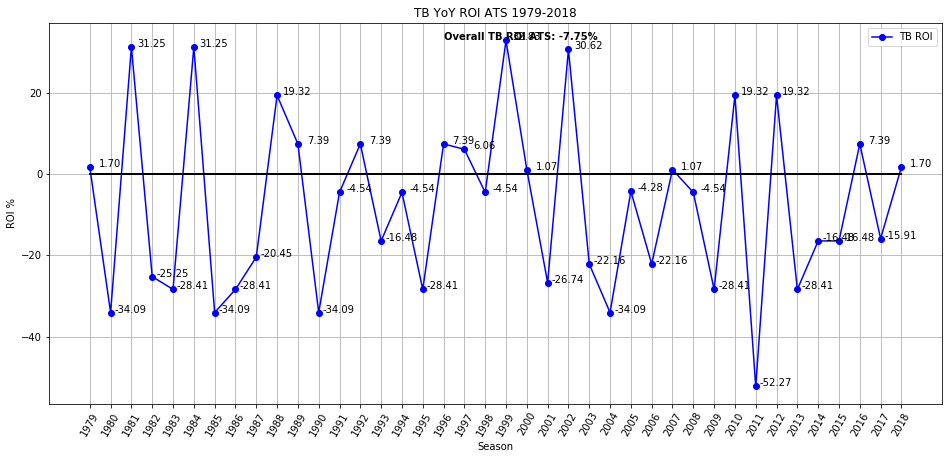

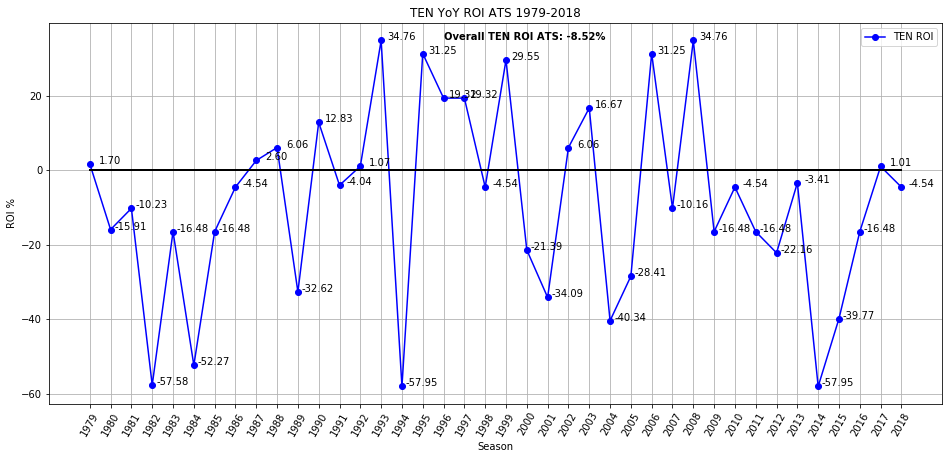

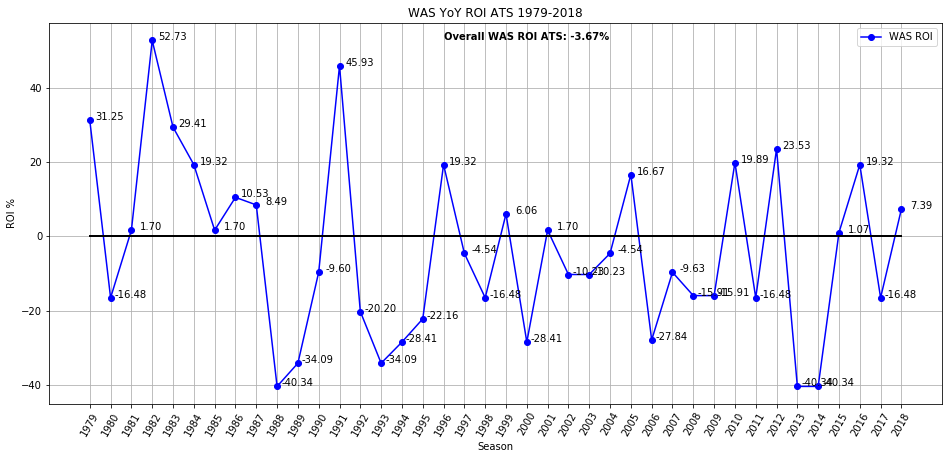

In [51]:
n = 1
team_id = nfl_teams['team_id']
team_id_nodups = team_id.drop_duplicates()
for i in team_id_nodups:
    team = i
    is_team = hist_data_name[(hist_data_name.team_home == team) | (hist_data_name.team_away == team)].copy()
    conditions = [(is_team['ATS_winner'] == team),
                 (is_team['ATS_winner'] == 'Push')]
    choices = [round(bet*(10/11),2), round(0,2)]
    is_team['ind_game_taking'] = np.select(conditions,choices, default = round(-bet,2))
    team_takings = {}
    for j in Seasons:
        is_Season = (is_team['schedule_season'] == j)
        is_team_iter1 = is_team[is_Season]
        s = is_team_iter1['ind_game_taking']
        taking = round(s.sum(),2)
        total_bet = (s.count())*bet
        ROI = round((taking/total_bet)*100,2)
        team_takings[j] = [taking, total_bet, ROI]
    #Extract ROI information for each team
    ind_team_ROI = []
    for i in team_takings:
        ROI_i = team_takings[i][2]
        ind_team_ROI.append(ROI_i)

    #Now plot and format:

    teamROI_mean = round(statistics.mean(ind_team_ROI),2)

    plt.figure(n,figsize = [16,7])
    plt.plot(Seasons,ind_team_ROI,'bo-',label = '{} ROI'.format(team))
    plt.plot(Seasons,np.zeros(len(Seasons)),'k-', linewidth = 2)
    plt.xlabel('Season')
    plt.xticks(Seasons, rotation = 60)
    plt.ylabel('ROI %')
    plt.grid()
    for x,y in zip(Seasons, ind_team_ROI):
        label_under = "{:.2f}".format(y)
        plt.annotate(label_under,(x,y),textcoords = "offset points",xytext=(20,0),ha = 'center')
    plt.text(1996,max(ind_team_ROI),'Overall {} ROI ATS: {}%'.format(team,teamROI_mean),weight = 'bold',fontsize = 10)
    plt.legend()
    plt.title('{} YoY ROI ATS 1979-2018'.format(team))
    plt.show()
    n +=1